#  APS component failure classification in Scania Trucks

# 1. Business Problem

## 1.1. Description

+ Introduction

The dataset consists of data collected from heavy Scania 
trucks in everyday usage. The system in focus is the 
Air Pressure system (APS) which generates pressurised 
air that are utilized in various functions in a truck, 
such as braking and gear changes. The datasets' 
positive class consists of component failures 
for a specific component of the APS system. 
The negative class consists of trucks with failures 
for components not related to the APS. The data consists 
of a subset of all available data, selected by experts.     


+ Attributes

The attribute names of the data have been anonymized for 
proprietary reasons. It consists of both single numerical 
counters and histograms consisting of bins with different 
conditions. 

The attributes are as follows: class, then 
anonymized operational data. The operational data have 
an identifier and a bin id, like "Identifier_Bin".
In total there are 171 attributes, of which 7 are 
histogram variabels. Missing values are denoted by "na".

+ Challenge metric  

The contestants will be measure according to the following 
cost-metric of miss-classification:

<TABLE border="1">
<TR><TD rowspan = "2">Predicted Class<TH colspan="2">Trueclass
<TR><TH>pos<TH>neg
<TR><TH>pos<TD>-<TD>Cost_1<TD>
<TR><TH>neg<TD>Cost_2<TD>-<TD>
</TABLE>
    
**Cost_1 = 10 and cost_2 = 500**

The total cost of a prediction model the sum of "Cost_1" 
multiplied by the number of Instances with type 1 failure 
and "Cost_2" with the number of instances with type 2 failure, 
resulting in a "Total_cost".

In this case Cost_1 refers to the cost that an unnessecary 
check needs to be done by an mechanic at an workshop, while 
Cost_2 refer to the cost of missing a faulty truck, 
which may cause a breakdown.

**Total_cost = Cost_1*No_Instances + Cost_2*No_Instances**

  

## 1.2 Sources/Useful Links

Data Source : 
1. https://ida2016.blogs.dsv.su.se/?page_id=1387 (or)
2. https://www.kaggle.com/uciml/aps-failure-at-scania-trucks-data-set (or) 
3. https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks

Research Paper & Blogs: 
1. https://www.researchgate.net/publication/330854331_An_Empirical_Comparison_of_Missing_Value_Imputation_Techniques_on_APS_Failure_Prediction
2. 	https://medium.com/analytics-vidhya/aps-failure-at-scania-trucks-data-set-1eb97b12812
3.  https://medium.com/swlh/aps-failure-at-scania-trucks-203975cdc2dd
4. https://www.researchgate.net/publication/309195602_Prediction_of_Failures_in_the_Air_Pressure_System_of_Scania_Trucks_Using_a_Random_Forest_and_Feature_Engineering

## 1.3 Real world/Business Objectives and Constraints

- The cost of misclassification should be minimized paricularly false negative(cost2 = 500)
- No strict latency concern

# 2. Machine Learning Probelm

## 2.1 Data 

### 2.1.1 Data Overview 

<p> 
The data comes in two files, one training set which 
contain the class labels and a test set which has an 
additional id number for each example and "na" as 
class label. Both of these sets are sampled from the 
same source with stratification regarding the class, 
hence they should contain roughly the same distribution 
of faulty and non-faulty components.  

The training set contains 60000 examples in total in which 
59000 belong to the negative class and 1000 positive class. 
The test set contains 16000 examples.
</p>

- Train Data: 60,000 datapoints and 171 columns
- Test Data: 16,000 datapoints and 171 columns

### 2.1.2 Example Data point 

<pre>
class,aa_000,ab_000,ac_000,ad_000,ae_000,.......,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
neg,76698,na,2130706438,280,0,.....,469792,339156,157956,73224,0,0,0
neg,33058,na,0,na,0,0,.....,245416,133654,81140,97576,1500,0,0
neg,41040,na,228,100,0,0....,423992,409564,320746,158022,95128,514,0,0
</pre>

## 2.2 Mapping the real world problem to an ML problem

### 2.2.1 Type of Machine Leaning Problem 

<p> It is a binary classification problem, for a given datapoint we need to predict if the failure occured due to APS or not. </p>

### 2.2.2 Performance Metric 


Here we need to minimize the cost of misclassification i.e., our model should have very low false negative and also low false postive.

- **Recall Score** or **F1-score** or **cost_function**(Total_cost = (Cost_1 X No_FP) + (Cost_2 X No_FN))


## 2.3 Train and Test Construction

 
- we build train and CV datasets by splitting the avialable datset in the ratio of 85:15. Train datset is for training the model and CV dataset is for hyper-parameter tuning.
- And the available test dataset is for evaluating the model.


# 3. Exploratory data analysis

In [2]:
#importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 

import warnings
warnings.filterwarnings('ignore')

## 3.1 Train Data

In [2]:
#loading data from csv file
train_data = pd.read_csv('aps_failure_training_set.csv', na_values = 'na')

In [3]:
print(train_data.shape)
train_data.head()

(60000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


- From Visual Inspection data seems to have many NaN values.

In [4]:
print(train_data['class'].value_counts())

neg    59000
pos     1000
Name: class, dtype: int64


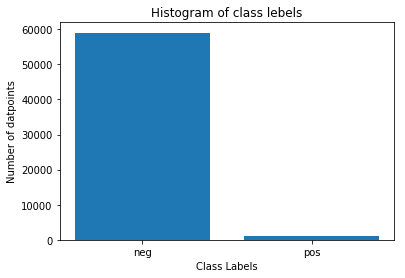

Percentage of "neg" class data points: 98.333
Percentage of "pos" class data points: 1.667


In [5]:
plt.bar(train_data['class'].unique(),train_data['class'].value_counts())
plt.xlabel("Class Labels")
plt.ylabel("Number of datpoints")
plt.title("Histogram of class lebels")
plt.show()

print('Percentage of "neg" class data points: {}'.format(np.round(train_data[train_data['class']=='neg'].shape[0]*100/train_data.shape[0],3)))
print('Percentage of "pos" class data points: {}'.format(np.round(train_data[train_data['class']=='pos'].shape[0]*100/train_data.shape[0],3)))

- Only 1.67% of datapoints belongs to positive class(failure due to APS).
- The Train dataset available is **highly imbalanced**.

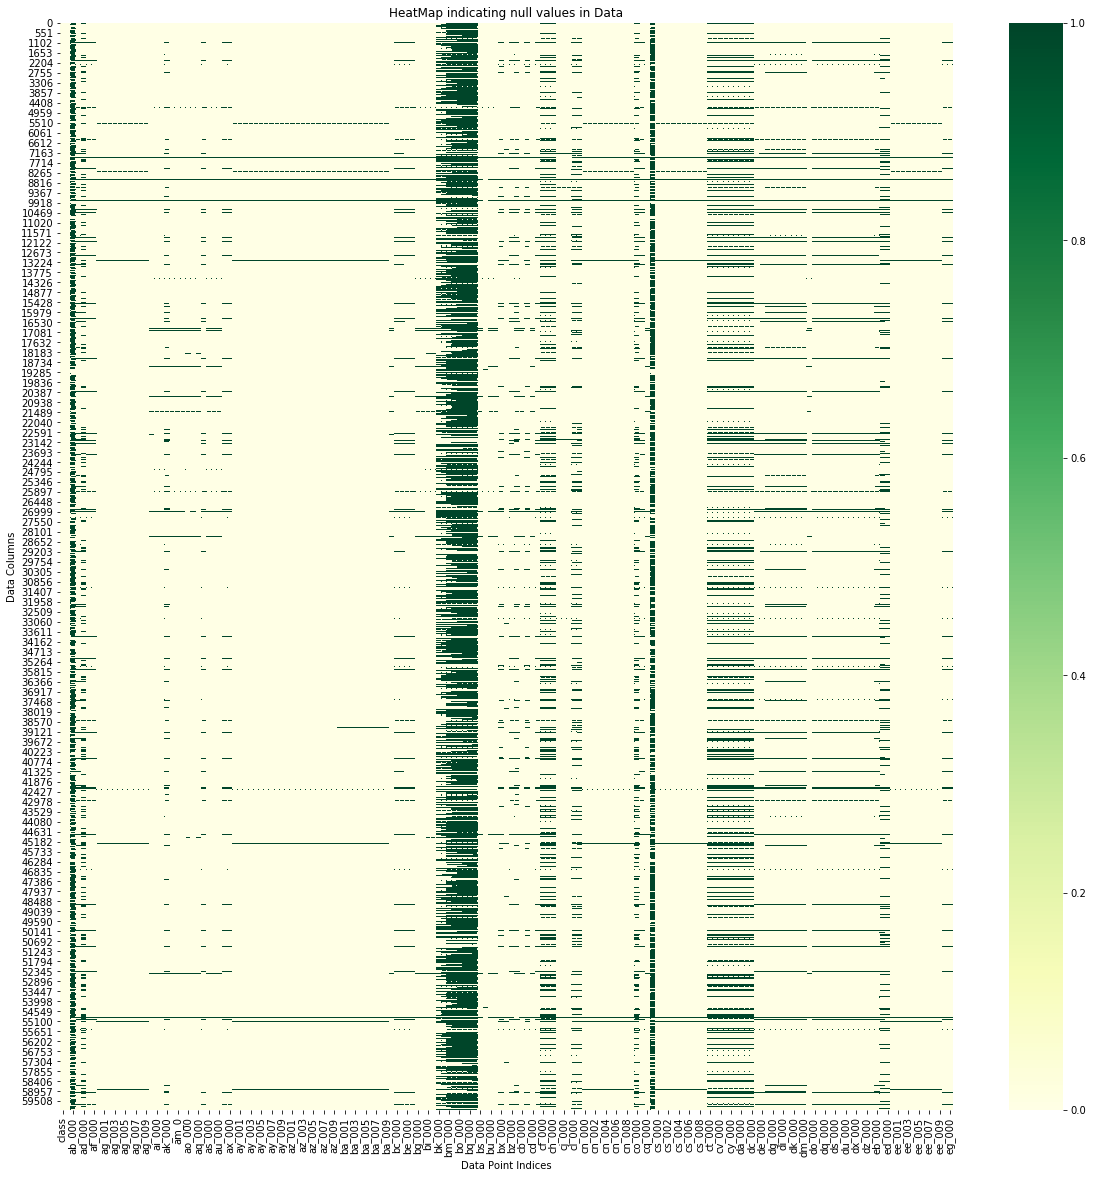

In [7]:
# plotting the heatmap using train data for visualizing the null values.
plt.figure(figsize=(20,20))
sns.heatmap(train_data.isnull(), cmap = 'YlGn')
plt.title("HeatMap indicating null values in Data")
plt.xlabel("Data Point Indices")
plt.ylabel("Data Columns")
plt.show()

- Heatmap representing occurance of NaN values: 
- - 0(Yellow) for non NaN value
- - 1(Green) for NaN values.

In [8]:
train_data.describe(include = 'all')

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,neg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,NaN,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,NaN,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,NaN,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,NaN,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000


In [9]:
#checking if there are any missing values in columns
print('Number of columns with missing(NaN) values :{}'.format(train_data.isnull().any().sum()))
print('Number of columns with no missing(NaN) values :{}'.format(train_data.shape[1] - train_data.isnull().any().sum()))
print('='*100)
#checking if there are any missing values in rows
print('Number of rows with missing(NaN) values :{}'.format(train_data.isnull().any(axis = 1).sum()))
print('Number of rows with no missing(NaN) values :{}'.format(train_data.shape[0] - train_data.isnull().any(axis = 1).sum()))

Number of columns with missing(NaN) values :169
Number of columns with no missing(NaN) values :2
Number of rows with missing(NaN) values :59409
Number of rows with no missing(NaN) values :591


In [10]:
print("Number of Missing values in each column:")
print(train_data.isnull().sum())

Number of Missing values in each column:
class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
af_000     2500
ag_000      671
ag_001      671
ag_002      671
ag_003      671
ag_004      671
ag_005      671
ag_006      671
ag_007      671
ag_008      671
ag_009      671
ah_000      645
ai_000      629
aj_000      629
ak_000     4400
al_000      642
am_0        629
an_000      642
ao_000      589
ap_000      642
aq_000      589
ar_000     2723
as_000      629
at_000      629
          ...  
dl_000     4008
dm_000     4009
dn_000      691
do_000     2724
dp_000     2726
dq_000     2726
dr_000     2726
ds_000     2727
dt_000     2727
du_000     2726
dv_000     2726
dx_000     2723
dy_000     2724
dz_000     2723
ea_000     2723
eb_000     4007
ec_00     10239
ed_000     9553
ee_000      671
ee_001      671
ee_002      671
ee_003      671
ee_004      671
ee_005      671
ee_006      671
ee_007      671
ee_008      671
ee_009      671
ef_000     2724

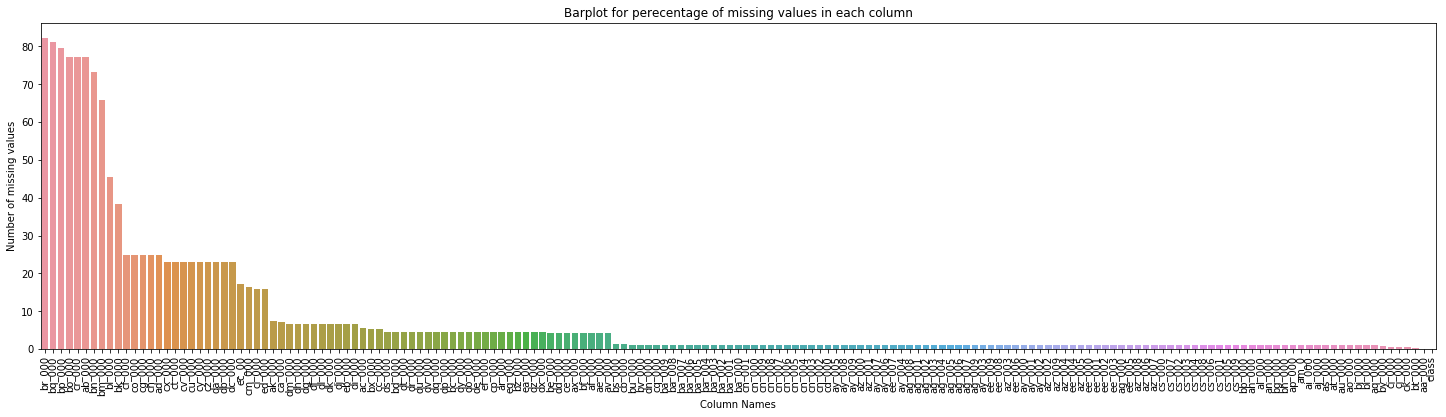

In [13]:
cols_miss_perc = (train_data.isnull().sum()*100/train_data.shape[0]).sort_values(ascending = False)
plt.figure(figsize=(25, 6))
sns.barplot(x =cols_miss_perc.index, y =cols_miss_perc)
plt.title('Barplot for perecentage of missing values in each column')
plt.xlabel('Column Names')
plt.xticks(rotation=90)
plt.ylabel('Number of missing values')
plt.show()

- There are columns which have morethan 50% NaN values.

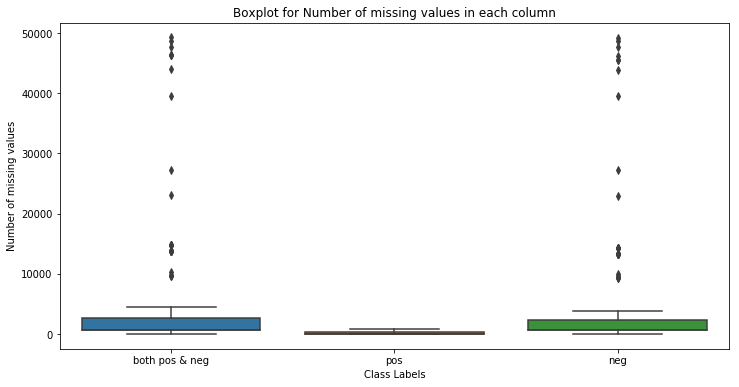

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = [train_data.isnull().sum(),train_data[train_data['class']=='pos'].isnull().sum(),train_data[train_data['class']=='neg'].isnull().sum()])\
   .set_xticklabels(['both pos & neg','pos', 'neg'])
plt.title('Boxplot for Number of missing values in each column')
plt.xlabel('Class Labels')
plt.ylabel('Number of missing values')
plt.show()

- The majority part of distribution of Number of missing values(in each column) lies between 0 and 1000.  
- The distributions of Number of missing values(in each column) of 'pos' class lies below the 'neg' class distibution(claerly its blow the 25th percentile of negative class).

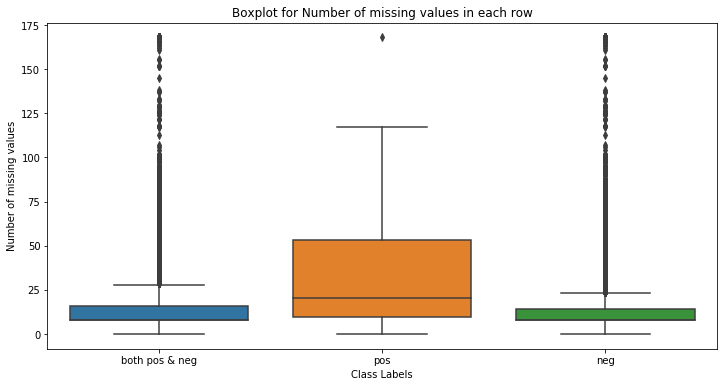

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = [train_data.isnull().sum(axis = 1),train_data[train_data['class']=='pos'].isnull().sum(axis = 1),train_data[train_data['class']=='neg'].isnull().sum(axis = 1)])\
   .set_xticklabels(['both pos & neg','pos', 'neg'])
plt.title('Boxplot for Number of missing values in each row')
plt.xlabel('Class Labels')
plt.ylabel('Number of missing values')
plt.show()

- The majority part of distribution of Number of missing values(in each row) lies between 0 and 25. 
- Thee distribution of Number of missing values(in each row) of 'pos' class lies above the 'neg' class.
- The missing values idicators can be used as a features for the classification task.

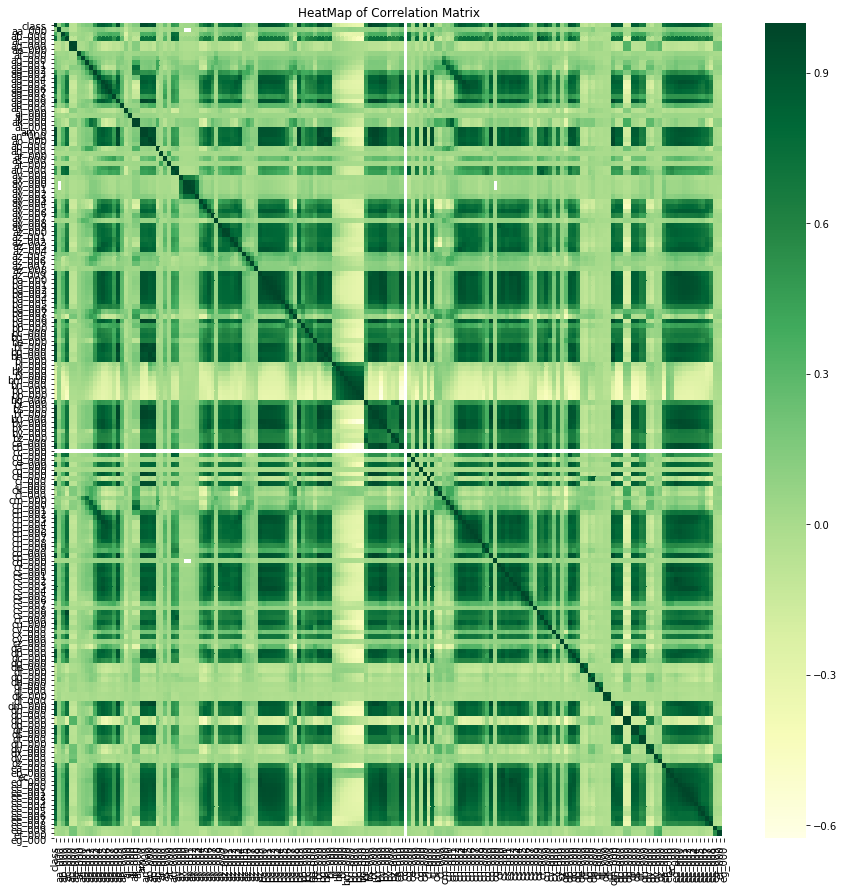

In [19]:
# Determining the correlation matrix for features using spearman correlation
corr_matrix = train_data.corr(method='spearman')

#plotting the heatmap of correlation matrix.
plt.figure(figsize=(15,15))
sns.heatmap(data = corr_matrix, xticklabels=train_data.columns, yticklabels=train_data.columns, cmap = 'YlGn')
plt.title("HeatMap of Correlation Matrix")
plt.show()

- There are many correlated columns.
- Some of the ML models may perform bad because of this.
- we can make use use dimensionality reduction techniques like PCA & SVD.

## 3.2 Test Data

In [3]:
#loading data from csv file
test_data = pd.read_csv('aps_failure_test_set.csv', na_values = 'na')

In [21]:
print(test_data.shape)
test_data.head()

(16000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [22]:
(train_data.columns == test_data.columns).all()

True

In [23]:
print(test_data['class'].value_counts())

neg    15625
pos      375
Name: class, dtype: int64


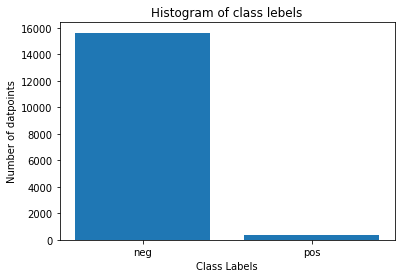

Percentage of "neg" class data points: 97.656
Percentage of "pos" class data points: 2.344


In [24]:
plt.bar(test_data['class'].unique(),test_data['class'].value_counts())
plt.xlabel("Class Labels")
plt.ylabel("Number of datpoints")
plt.title("Histogram of class lebels")
plt.show()

print('Percentage of "neg" class data points: {}'.format(np.round(test_data[test_data['class']=='neg'].shape[0]*100/test_data.shape[0],3)))
print('Percentage of "pos" class data points: {}'.format(np.round(test_data[test_data['class']=='pos'].shape[0]*100/test_data.shape[0],3)))

- Only 2.34% of test data belongs to 'pos' class.

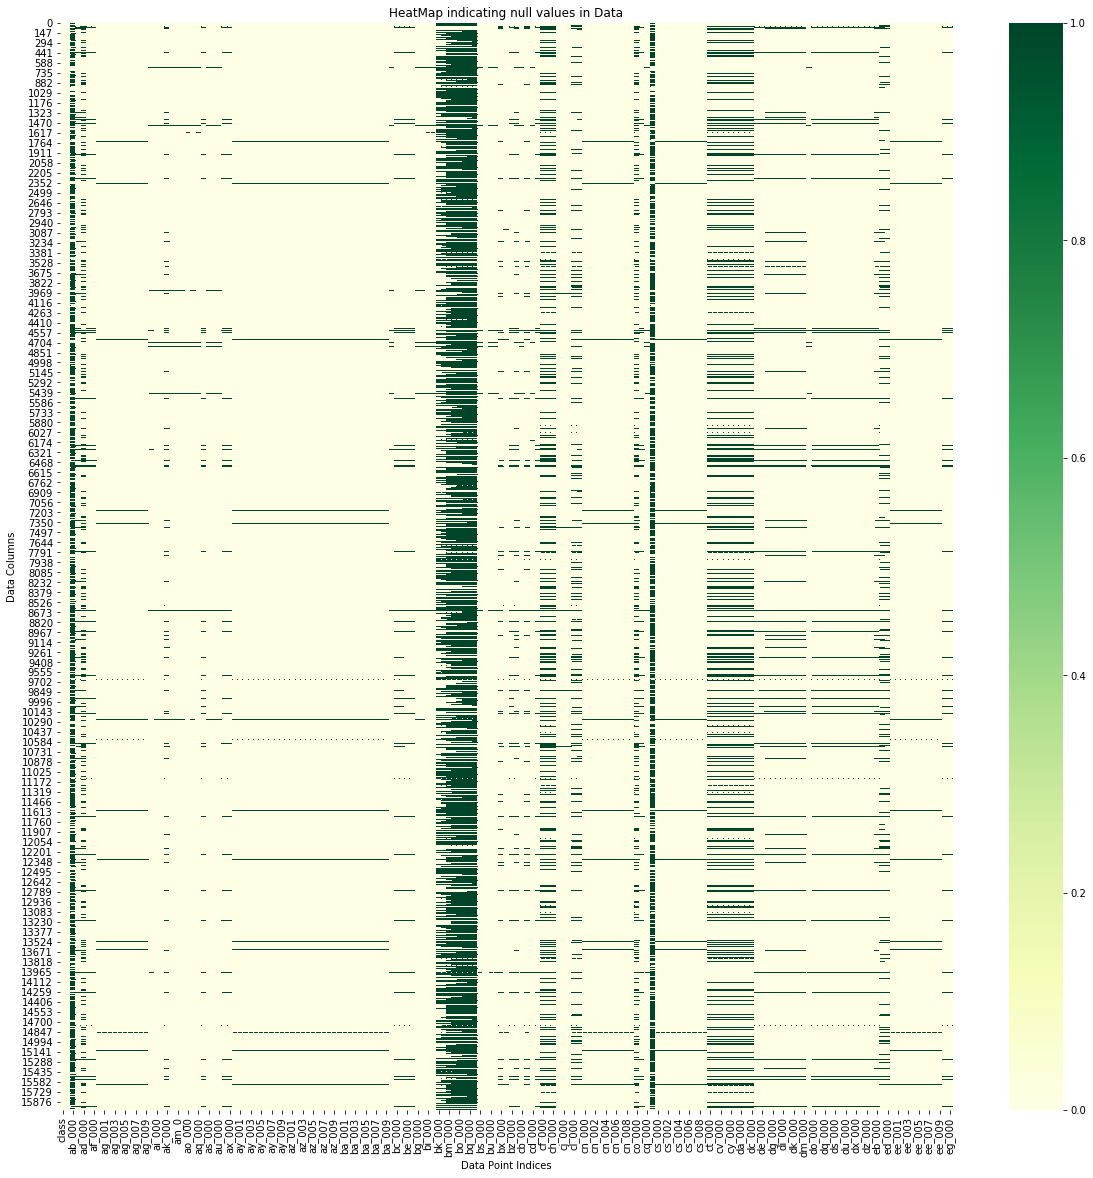

In [25]:
# plotting the heatmap using test data for visualizing the null values.
plt.figure(figsize=(20,20))
sns.heatmap(test_data.isnull(), cmap = 'YlGn')
plt.title("HeatMap indicating null values in Data")
plt.xlabel("Data Point Indices")
plt.ylabel("Data Columns")
plt.show()

- Heatmap representing NaN values: 0(Yellow) for non NaN value and 1(Green) for NaN values.
- same as in train data, test data too have many NaN values

# 4. Preprocessing Data

## 4.1 Train Data

In [4]:
#replacing 'neg' and 'pos' class labels with 0 & 1
train_data['class'].replace({'neg':0}, inplace = True)
train_data['class'].replace({'pos':1}, inplace = True)

In [5]:
from sklearn.model_selection import train_test_split

x_train = train_data.drop('class', axis = 1)
y_train = train_data['class']
print('Before Splitting :')
print(x_train.shape, ' ', y_train.shape)
print('='*100)
#splitting data into 85:15 for train & CV data 
x_train, x_cv, y_train, y_cv = train_test_split(x_train,y_train,test_size=0.15,stratify = y_train)
print('After Splitting :')
print(x_train.shape, ' ', y_train.shape)
print(x_cv.shape, ' ', y_cv.shape)

Before Splitting :
(60000, 170)   (60000,)
After Splitting :
(51000, 170)   (51000,)
(9000, 170)   (9000,)


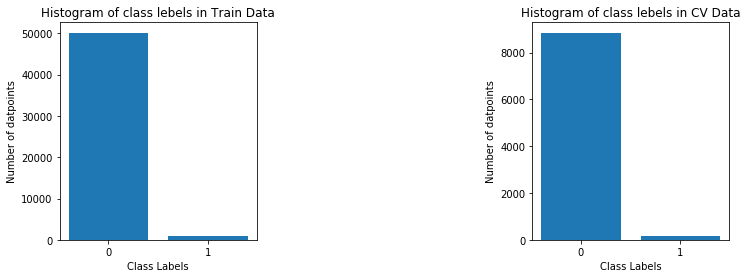

Percentage of "neg" class Train data points: 0.98333
Percentage of "pos" class Train data points: 0.01667
Percentage of "neg" class CV data points: 0.98333
Percentage of "pos" class CV data points: 0.01667


In [28]:
plt.figure(figsize=(12,4))

plt.subplot(1, 3, 1)
plt.bar(['0','1'],y_train.value_counts())
plt.xlabel("Class Labels")
plt.ylabel("Number of datpoints")
plt.title("Histogram of class lebels in Train Data")

plt.subplot(1, 3, 3)
plt.bar(['0','1'],y_cv.value_counts())
plt.xlabel("Class Labels")
plt.ylabel("Number of datpoints")
plt.title("Histogram of class lebels in CV Data")

plt.show()

print('Percentage of "neg" class Train data points: {}'.format(np.round(1 - y_train.sum()/y_train.shape[0],5)))
print('Percentage of "pos" class Train data points: {}'.format(np.round(y_train.sum()/y_train.shape[0],5)))

print('Percentage of "neg" class CV data points: {}'.format(np.round(1 - y_cv.sum()/y_cv.shape[0],5)))
print('Percentage of "pos" class CV data points: {}'.format(np.round(y_cv.sum()/y_cv.shape[0],5)))

## 4.2 Test Data

In [6]:
#replacing 'neg' and 'pos' class labels with 0 & 1
test_data['class'].replace({'neg':0}, inplace = True)
test_data['class'].replace({'pos':1}, inplace = True)

In [7]:
x_test = test_data.drop('class', axis = 1)
y_test = test_data['class']

print(x_test.shape, ' ', y_test.shape)

(16000, 170)   (16000,)


## 4.3 Standardization

In [8]:
#stndardising data using StandardScaler
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(x_train)
x_train = pd.DataFrame(std_scaler.transform(x_train), columns = x_train.columns)
x_cv = pd.DataFrame(std_scaler.transform(x_cv), columns = x_train.columns)
x_test = pd.DataFrame(std_scaler.transform(x_test), columns = x_train.columns)

joblib.dump(std_scaler, 'std_scaler.pkl')
x_train.to_csv('x_train.csv', index = False)
x_cv.to_csv('x_cv.csv', index = False)
y_train.to_csv('y_train.csv', index = False)
y_cv.to_csv('y_cv.csv', index = False)
x_test.to_csv('x_test.csv', index = False)
y_test.to_csv('y_test.csv', index = False)

## 4.4 Handling Missing Data - Imputation

- In all the previous works(references mentioned in the begining of notebook), the median based imputer performed better than other simple imputation technique.
- In this work I am going to try out some model based imputation techniques along with median imputer(as a baseline model to make a report comparing other techniques).
- 1. Median Imputer
- 2. KNN imputer
- 3. Iterative Imputer (using BayesianRidge regressor as estimator)
- 4. Supervised Learning model based imputer(using RandomForestRegressor of sklearn)
- 5. Unsupervised Learning model based imputer(using BayesianGaussianMixture of sklearn)


In [4]:
#using pandas dataframe style attribute to highlight nan positons
def highlight_nan_positions(x):
    x = x_train.head().isnull()
    x[x] = 'background-color: green'
    x.replace(to_replace=False, value='', inplace = True)
    return x 

x_train.head().style.apply(highlight_nan_positions, axis = None)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.412768,nan,2.22449,-0.0050884,-0.0415267,-0.0515484,-0.0110775,-0.0287131,-0.0574609,-0.115923,-0.102717,0.524467,0.653145,0.156491,-0.066986,-0.0323594,0.372226,0.0757417,-0.0223149,-0.0123994,-0.108068,-0.107246,0.389203,0.295524,0.369386,0.680161,-0.0920226,-0.0124003,-0.0432651,-0.0153901,0.198544,-0.108529,-0.0259463,-0.0187265,-0.0258422,-0.0355156,-0.0293741,0.117677,0.294044,0.74142,-0.192719,-0.0124191,-0.0307123,-0.0903161,-0.0479288,0.415135,0.936239,0.00458366,-0.112465,-0.0612377,-0.0427967,-0.0124135,0.161529,0.6131,0.375283,0.493271,0.540559,0.432383,0.464168,0.868682,-0.0212879,-0.104678,0.377493,0.0306885,-0.138383,0.154371,-0.0829466,0.373129,0.306676,0.369053,0.317658,0.261018,-0.071562,-0.278914,-0.418593,-0.548228,-0.548453,-0.388674,nan,-0.484383,0.412189,0.379888,0.379888,0.43154,0.550838,-0.159159,-1.00545,-0.663708,0.431942,0,0.699666,-0.00510947,0.0282905,-0.0144505,0.413558,-0.0906062,0.140171,-0.0739108,-0.201694,-0.0400736,-0.0900682,-0.144127,0.0363861,0.74153,0.566872,-0.0204548,-0.0418029,-0.0480005,-0.0282137,-0.00509592,-0.011333,0.379888,nan,0.561721,0.305897,-0.187409,0.183047,0.0523063,0.648411,0.297844,0.023984,-0.00956326,-0.00511423,0.219766,-0.00484068,1.36544,0.20646,-0.0314317,0.211546,-0.0383961,-0.0718104,1.16732,0.127237,-0.0719956,-0.0169995,-0.0248949,-0.0128911,-0.0893077,-0.0094458,-0.028673,-0.0245835,-0.0275288,0.348322,0.557505,1.38302,-0.0468121,-0.149719,0.14615,0.101034,1.23485,0.592306,-0.191536,-0.130077,-0.0207706,-0.0297031,-0.224144,0.567836,0.661946,0.138416,0.290268,0.458787,0.608186,0.679417,0.840183,0.228852,-0.0530135,0.508358,0.683456,-0.021194,-0.0230515
1,-0.405669,-0.233631,-0.449542,-0.00511864,-0.0415267,-0.0515484,-0.0110775,-0.0287131,-0.0574609,-0.116117,-0.182222,-0.337041,-0.422254,-0.348867,-0.15856,-0.0337949,-0.430016,-0.0537913,-0.0193816,-0.0123994,-0.109071,-0.109677,-0.44084,-0.436828,-0.321166,-0.348591,-0.0920226,-0.0124003,-0.0432651,-0.0153901,-0.162634,-0.210898,-0.0259463,-0.0187265,-0.0258422,-0.0355156,-0.0293904,-0.083665,-0.330442,-0.298648,-0.259358,-0.0124191,-0.0884329,-0.126309,-0.0799552,-0.129085,-0.348481,-0.328369,-0.106339,-0.0612377,-0.0427967,-0.0124135,-0.369086,-0.376781,-0.341868,-0.362133,-0.376483,-0.3699,-0.33226,-0.349005,-0.143353,-0.104649,-0.412333,-0.136329,-0.183293,-0.145053,-0.13249,-0.430504,-0.377149,-0.324306,-0.280017,nan,nan,nan,nan,nan,nan,nan,nan,-0.814555,-0.406202,-0.412401,-0.412401,-0.392979,-0.405269,-0.159443,-0.991305,-1.02257,-0.39311,0,-0.446686,-0.00510956,-0.236357,-0.0144505,-0.414745,-0.0906062,-0.327489,-0.0739108,-0.192422,-0.0400736,-0.0900682,-0.149563,-0.237179,-0.378803,-0.423959,-0.317452,-0.156536,-0.104638,-0.0302377,-0.00511654,-0.0719138,-0.412401,-0.0346993,-0.417083,-0.256465,-0.1977,-0.31944,-0.211455,-0.394

### 4.4.1 Median Imputer

In [9]:
from sklearn.impute import SimpleImputer

#Training the simpleImputer model with training data
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
median_imputer.fit(x_train)

#transforming train, cv and test data with median imputer 
x_tr_med = pd.DataFrame(median_imputer.transform(x_train), columns = x_train.columns)
x_cv_med = pd.DataFrame(median_imputer.transform(x_cv), columns = x_train.columns)
x_te_med = pd.DataFrame(median_imputer.transform(x_test), columns = x_train.columns)

#saving trained model and transformed datasets
joblib.dump(median_imputer, 'median_imputer.pkl')
x_tr_med.to_csv('x_tr_med.csv', index = False)
x_cv_med.to_csv('x_cv_med.csv', index = False)
x_te_med.to_csv('x_te_med.csv', index = False)

In [13]:
#x_train after imputation
x_tr_med.head().style.apply(highlight_nan_positions, axis = None)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.412768,-0.233631,2.22449,-0.0050884,-0.0415267,-0.0515484,-0.0110775,-0.0287131,-0.0574609,-0.115923,-0.102717,0.524467,0.653145,0.156491,-0.066986,-0.0323594,0.372226,0.0757417,-0.0223149,-0.0123994,-0.108068,-0.107246,0.389203,0.295524,0.369386,0.680161,-0.0920226,-0.0124003,-0.0432651,-0.0153901,0.198544,-0.108529,-0.0259463,-0.0187265,-0.0258422,-0.0355156,-0.0293741,0.117677,0.294044,0.74142,-0.192719,-0.0124191,-0.0307123,-0.0903161,-0.0479288,0.415135,0.936239,0.00458366,-0.112465,-0.0612377,-0.0427967,-0.0124135,0.161529,0.6131,0.375283,0.493271,0.540559,0.432383,0.464168,0.868682,-0.0212879,-0.104678,0.377493,0.0306885,-0.138383,0.154371,-0.0829466,0.373129,0.306676,0.369053,0.317658,0.261018,-0.071562,-0.278914,-0.418593,-0.548228,-0.548453,-0.388674,-0.523034,-0.484383,0.412189,0.379888,0.379888,0.43154,0.550838,-0.159159,-1.00545,-0.663708,0.431942,0,0.699666,-0.00510947,0.0282905,-0.0144505,0.413558,-0.0906062,0.140171,-0.0739108,-0.201694,-0.0400736,-0.0900682,-0.144127,0.0363861,0.74153,0.566872,-0.0204548,-0.0418029,-0.0480005,-0.0282137,-0.00509592,-0.011333,0.379888,-0.0346993,0.561721,0.305897,-0.187409,0.183047,0.0523063,0.648411,0.297844,0.023984,-0.00956326,-0.00511423,0.219766,-0.00484068,1.36544,0.20646,-0.0314317,0.211546,-0.0383961,-0.0718104,1.16732,0.127237,-0.0719956,-0.0169995,-0.0248949,-0.0128911,-0.0893077,-0.0094458,-0.028673,-0.0245835,-0.0275288,0.348322,0.557505,1.38302,-0.0468121,-0.149719,0.14615,0.101034,1.23485,0.592306,-0.191536,-0.130077,-0.0207706,-0.0297031,-0.224144,0.567836,0.661946,0.138416,0.290268,0.458787,0.608186,0.679417,0.840183,0.228852,-0.0530135,0.508358,0.683456,-0.021194,-0.0230515
1,-0.405669,-0.233631,-0.449542,-0.00511864,-0.0415267,-0.0515484,-0.0110775,-0.0287131,-0.0574609,-0.116117,-0.182222,-0.337041,-0.422254,-0.348867,-0.15856,-0.0337949,-0.430016,-0.0537913,-0.0193816,-0.0123994,-0.109071,-0.109677,-0.44084,-0.436828,-0.321166,-0.348591,-0.0920226,-0.0124003,-0.0432651,-0.0153901,-0.162634,-0.210898,-0.0259463,-0.0187265,-0.0258422,-0.0355156,-0.0293904,-0.083665,-0.330442,-0.298648,-0.259358,-0.0124191,-0.0884329,-0.126309,-0.0799552,-0.129085,-0.348481,-0.328369,-0.106339,-0.0612377,-0.0427967,-0.0124135,-0.369086,-0.376781,-0.341868,-0.362133,-0.376483,-0.3699,-0.33226,-0.349005,-0.143353,-0.104649,-0.412333,-0.136329,-0.183293,-0.145053,-0.13249,-0.430504,-0.377149,-0.324306,-0.280017,-0.267463,-0.311055,-0.394841,-0.456915,-0.488918,-0.507121,-0.520051,-0.523034,-0.814555,-0.406202,-0.412401,-0.412401,-0.392979,-0.405269,-0.159443,-0.991305,-1.02257,-0.39311,0,-0.446686,-0.00510956,-0.236357,-0.0144505,-0.414745,-0.0906062,-0.327489,-0.0739108,-0.192422,-0.0400736,-0.0900682,-0.149563,-0.237179,-0.378803,-0.423959,-0.317452,-0.156536,-0.104638,-0.0302377,-0.00511654,-0.0719138,-0.4124

### 4.4.2 KNNImputer

In [5]:
from sklearn.impute import KNNImputer

#fitting training data to KNNImputer model 
KNN_Imputer = KNNImputer(missing_values = np.nan, weights='distance')
KNN_Imputer.fit(x_train)

#transforming train, cv and test with KNN_Imputer
x_tr_KNN = pd.DataFrame(KNN_Imputer.transform(x_train), columns = x_train.columns)
x_cv_KNN = pd.DataFrame(KNN_Imputer.transform(x_cv), columns = x_train.columns)
x_te_KNN = pd.DataFrame(KNN_Imputer.transform(x_test), columns = x_train.columns)

#saving trained model and transformed datasets
joblib.dump(KNN_Imputer, 'KNN_Imputer.pkl')
x_tr_KNN.to_csv('x_tr_KNN.csv', index = False)
x_cv_KNN.to_csv('x_cv_KNN.csv', index = False)
x_te_KNN.to_csv('x_te_KNN.csv', index = False)

In [6]:
#x_train after imputation
x_tr_KNN.head().style.apply(highlight_nan_positions, axis = None)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.412768,-0.233631,2.22449,-0.0050884,-0.0415267,-0.0515484,-0.0110775,-0.0287131,-0.0574609,-0.115923,-0.102717,0.524467,0.653145,0.156491,-0.066986,-0.0323594,0.372226,0.0757417,-0.0223149,-0.0123994,-0.108068,-0.107246,0.389203,0.295524,0.369386,0.680161,-0.0920226,-0.0124003,-0.0432651,-0.0153901,0.198544,-0.108529,-0.0259463,-0.0187265,-0.0258422,-0.0355156,-0.0293741,0.117677,0.294044,0.74142,-0.192719,-0.0124191,-0.0307123,-0.0903161,-0.0479288,0.415135,0.936239,0.00458366,-0.112465,-0.0612377,-0.0427967,-0.0124135,0.161529,0.6131,0.375283,0.493271,0.540559,0.432383,0.464168,0.868682,-0.0212879,-0.104678,0.377493,0.0306885,-0.138383,0.154371,-0.0829466,0.373129,0.306676,0.369053,0.317658,0.261018,-0.071562,-0.278914,-0.418593,-0.548228,-0.548453,-0.388674,-0.982008,-0.484383,0.412189,0.379888,0.379888,0.43154,0.550838,-0.159159,-1.00545,-0.663708,0.431942,0,0.699666,-0.00510947,0.0282905,-0.0144505,0.413558,-0.0906062,0.140171,-0.0739108,-0.201694,-0.0400736,-0.0900682,-0.144127,0.0363861,0.74153,0.566872,-0.0204548,-0.0418029,-0.0480005,-0.0282137,-0.00509592,-0.011333,0.379888,-0.0346993,0.561721,0.305897,-0.187409,0.183047,0.0523063,0.648411,0.297844,0.023984,-0.00956326,-0.00511423,0.219766,-0.00484068,1.36544,0.20646,-0.0314317,0.211546,-0.0383961,-0.0718104,1.16732,0.127237,-0.0719956,-0.0169995,-0.0248949,-0.0128911,-0.0893077,-0.0094458,-0.028673,-0.0245835,-0.0275288,0.348322,0.557505,1.38302,-0.0468121,-0.149719,0.14615,0.101034,1.23485,0.592306,-0.191536,-0.130077,-0.0207706,-0.0297031,-0.224144,0.567836,0.661946,0.138416,0.290268,0.458787,0.608186,0.679417,0.840183,0.228852,-0.0530135,0.508358,0.683456,-0.021194,-0.0230515
1,-0.405669,-0.233631,-0.449542,-0.00511864,-0.0415267,-0.0515484,-0.0110775,-0.0287131,-0.0574609,-0.116117,-0.182222,-0.337041,-0.422254,-0.348867,-0.15856,-0.0337949,-0.430016,-0.0537913,-0.0193816,-0.0123994,-0.109071,-0.109677,-0.44084,-0.436828,-0.321166,-0.348591,-0.0920226,-0.0124003,-0.0432651,-0.0153901,-0.162634,-0.210898,-0.0259463,-0.0187265,-0.0258422,-0.0355156,-0.0293904,-0.083665,-0.330442,-0.298648,-0.259358,-0.0124191,-0.0884329,-0.126309,-0.0799552,-0.129085,-0.348481,-0.328369,-0.106339,-0.0612377,-0.0427967,-0.0124135,-0.369086,-0.376781,-0.341868,-0.362133,-0.376483,-0.3699,-0.33226,-0.349005,-0.143353,-0.104649,-0.412333,-0.136329,-0.183293,-0.145053,-0.13249,-0.430504,-0.377149,-0.324306,-0.280017,3.93228,3.08428,2.23414,1.82135,1.60369,1.45979,1.3541,1.28834,-0.814555,-0.406202,-0.412401,-0.412401,-0.392979,-0.405269,-0.159443,-0.991305,-1.02257,-0.39311,0,-0.446686,-0.00510956,-0.236357,-0.0144505,-0.414745,-0.0906062,-0.327489,-0.0739108,-0.192422,-0.0400736,-0.0900682,-0.149563,-0.237179,-0.378803,-0.423959,-0.317452,-0.156536,-0.104638,-0.0302377,-0.00511654,-0.0719138,-0.412401,-0.0346993,-0.

### 4.4.3 IterativeImputer with BayesianRidge regressor

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

#fitting training data to IterativeImputer model with BayesianRidge estimator
#By defaiult it uses BayesianRidge regressor as estimator
BayesianRidge_imputer = IterativeImputer(estimator = BayesianRidge() ,missing_values = np.nan, random_state=0)
BayesianRidge_imputer.fit(x_train)

#transforming train, cv and test with BayesianRidge_imputer
x_tr_BR = pd.DataFrame(BayesianRidge_imputer.transform(x_train), columns = x_train.columns)
x_cv_BR = pd.DataFrame(BayesianRidge_imputer.transform(x_cv), columns = x_train.columns)
x_te_BR = pd.DataFrame(BayesianRidge_imputer.transform(x_test), columns = x_train.columns)

#saving trained model and transformed datasets
joblib.dump(BayesianRidge_imputer, 'BayesianRidge_imputer.pkl')
x_tr_BR.to_csv('x_tr_BR.csv', index = False)
x_cv_BR.to_csv('x_cv_BR.csv', index = False)
x_te_BR.to_csv('x_te_BR.csv', index = False)

In [8]:
#x_train after imputation
x_tr_BR.head().style.apply(highlight_nan_positions, axis = None)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.412768,2.30811,2.22449,-0.0050884,-0.0415267,-0.0515484,-0.0110775,-0.0287131,-0.0574609,-0.115923,-0.102717,0.524467,0.653145,0.156491,-0.066986,-0.0323594,0.372226,0.0757417,-0.0223149,-0.0123994,-0.108068,-0.107246,0.389203,0.295524,0.369386,0.680161,-0.0920226,-0.0124003,-0.0432651,-0.0153901,0.198544,-0.108529,-0.0259463,-0.0187265,-0.0258422,-0.0355156,-0.0293741,0.117677,0.294044,0.74142,-0.192719,-0.0124191,-0.0307123,-0.0903161,-0.0479288,0.415135,0.936239,0.00458366,-0.112465,-0.0612377,-0.0427967,-0.0124135,0.161529,0.6131,0.375283,0.493271,0.540559,0.432383,0.464168,0.868682,-0.0212879,-0.104678,0.377493,0.0306885,-0.138383,0.154371,-0.0829466,0.373129,0.306676,0.369053,0.317658,0.261018,-0.071562,-0.278914,-0.418593,-0.548228,-0.548453,-0.388674,-0.517137,-0.484383,0.412189,0.379888,0.379888,0.43154,0.550838,-0.159159,-1.00545,-0.663708,0.431942,0,0.699666,-0.00510947,0.0282905,-0.0144505,0.413558,-0.0906062,0.140171,-0.0739108,-0.201694,-0.0400736,-0.0900682,-0.144127,0.0363861,0.74153,0.566872,-0.0204548,-0.0418029,-0.0480005,-0.0282137,-0.00509592,-0.011333,0.379888,-1.1648,0.561721,0.305897,-0.187409,0.183047,0.0523063,0.648411,0.297844,0.023984,-0.00956326,-0.00511423,0.219766,-0.00484068,1.36544,0.20646,-0.0314317,0.211546,-0.0383961,-0.0718104,1.16732,0.127237,-0.0719956,-0.0169995,-0.0248949,-0.0128911,-0.0893077,-0.0094458,-0.028673,-0.0245835,-0.0275288,0.348322,0.557505,1.38302,-0.0468121,-0.149719,0.14615,0.101034,1.23485,0.592306,-0.191536,-0.130077,-0.0207706,-0.0297031,-0.224144,0.567836,0.661946,0.138416,0.290268,0.458787,0.608186,0.679417,0.840183,0.228852,-0.0530135,0.508358,0.683456,-0.021194,-0.0230515
1,-0.405669,-0.233631,-0.449542,-0.00511864,-0.0415267,-0.0515484,-0.0110775,-0.0287131,-0.0574609,-0.116117,-0.182222,-0.337041,-0.422254,-0.348867,-0.15856,-0.0337949,-0.430016,-0.0537913,-0.0193816,-0.0123994,-0.109071,-0.109677,-0.44084,-0.436828,-0.321166,-0.348591,-0.0920226,-0.0124003,-0.0432651,-0.0153901,-0.162634,-0.210898,-0.0259463,-0.0187265,-0.0258422,-0.0355156,-0.0293904,-0.083665,-0.330442,-0.298648,-0.259358,-0.0124191,-0.0884329,-0.126309,-0.0799552,-0.129085,-0.348481,-0.328369,-0.106339,-0.0612377,-0.0427967,-0.0124135,-0.369086,-0.376781,-0.341868,-0.362133,-0.376483,-0.3699,-0.33226,-0.349005,-0.143353,-0.104649,-0.412333,-0.136329,-0.183293,-0.145053,-0.13249,-0.430504,-0.377149,-0.324306,-0.280017,0.171127,-0.0565563,-0.141643,-0.140439,-0.114475,-0.134006,-0.13151,-0.149107,-0.814555,-0.406202,-0.412401,-0.412401,-0.392979,-0.405269,-0.159443,-0.991305,-1.02257,-0.39311,0,-0.446686,-0.00510956,-0.236357,-0.0144505,-0.414745,-0.0906062,-0.327489,-0.0739108,-0.192422,-0.0400736,-0.0900682,-0.149563,-0.237179,-0.378803,-0.423959,-0.317452,-0.156536,-0.104638,-0.0302377,-0.00511654,-0.0719138,-0.412401,-0.

### 4.4.4 Imputation based on Regression model - RandomForestRegressor

In [9]:
from sklearn.impute import SimpleImputer
def regression_model_imputer_fit(X, reg_model):
    X_imputed = X.copy()
    
    #storing all the column indices in col_idcs
    col_idcs = np.arange(X_imputed.shape[1])
    col_miss_perc = X_imputed.isnull().sum()*100/X_imputed.shape[0]
    #filtering all the columns indices which have morethan 3% of values missing(these cols to be filled by model)
    model_imp_cols = np.argwhere(col_miss_perc>3).flatten()
    #filtering all the columns which have lessthan 3% of values missing(these to be filled medians of their respective columns)
    median_imp_cols =  np.array([col_idx for col_idx in col_idcs if col_idx not in model_imp_cols])
    
    #Imputing median_imp_cols using median imputer
    median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    median_imputer.fit(X_imputed.iloc[:,median_imp_cols])
    X_imputed.iloc[:,median_imp_cols] = median_imputer.transform(X_imputed.iloc[:,median_imp_cols])

    filled_cols = median_imp_cols

    for col_idx in model_imp_cols:
        #storing row indices in which the col_idx column have missing values
        missing_rows_in_col = np.isnan(X_imputed.iloc[:,col_idx])
        #fitting the regression model using non missing rows and filled_cols
        reg_model.fit(X_imputed[~missing_rows_in_col].iloc[:,filled_cols],X_imputed[~missing_rows_in_col].iloc[:,col_idx])
        X_imputed.iloc[:,col_idx][missing_rows_in_col] = reg_model.predict(X_imputed.iloc[:,filled_cols][missing_rows_in_col])
    return median_imputer, median_imp_cols, reg_model

def regression_model_imputer_transformer(X, median_imputer, median_imp_cols, reg_model):
    X_imputed = X.copy()
    #storing all the column indices in col_idcs
    col_idcs = np.arange(X_imputed.shape[1])
    #Imputing median_imp_cols using median_imputer 
    X_imputed.iloc[:,median_imp_cols] = median_imputer.transform(X_imputed.iloc[:,median_imp_cols])
    #filtering all the columns indices which  to be filled by reg_model
    model_imp_cols = np.array([col_idx for col_idx in col_idcs if col_idx not in median_imp_cols])
    filled_cols = median_imp_cols
    for col_idx in model_imp_cols:
        #storing row indices in which the col_idx column have missing values
        missing_rows_in_col = np.isnan(X_imputed.iloc[:,col_idx])
        if missing_rows_in_col.sum() == 0:
            continue
        #predicting theose missing values in col_idx column by using reg_model and filled_cols data in those missing_rows_in_col
        X_imputed.iloc[:,col_idx][missing_rows_in_col] = reg_model.predict(X_imputed.iloc[:,filled_cols][missing_rows_in_col])
    return X_imputed

In [10]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
#fitting the imputer model with the train data
reg_model_med_imputer, median_imp_cols, reg_mod_imp_RF  = regression_model_imputer_fit(x_train,model)
#imputing the missing data with the help of final regression model
x_tr_RF = regression_model_imputer_transformer(x_train, reg_model_med_imputer, median_imp_cols, reg_mod_imp_RF)
x_cv_RF = regression_model_imputer_transformer(x_cv, reg_model_med_imputer, median_imp_cols, reg_mod_imp_RF)
x_te_RF = regression_model_imputer_transformer(x_test, reg_model_med_imputer, median_imp_cols, reg_mod_imp_RF)

#saving trained model and transformed datasets
joblib.dump(reg_mod_imp_RF, 'reg_mod_imp_RF.pkl')
joblib.dump(reg_model_med_imputer, 'reg_model_med_imputer.pkl')
joblib.dump(median_imp_cols,'median_imp_cols.pkl')
x_tr_RF.to_csv('x_tr_RF.csv', index = False)
x_cv_RF.to_csv('x_cv_RF.csv', index = False)
x_te_RF.to_csv('x_te_RF.csv', index = False)

In [11]:
#x_train after imputation
x_tr_RF.head().style.apply(highlight_nan_positions, axis = None)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.412768,-0.0230515,2.22449,-0.0050884,-0.0415267,-0.0515484,-0.0110775,-0.0287131,-0.0574609,-0.115923,-0.102717,0.524467,0.653145,0.156491,-0.066986,-0.0323594,0.372226,0.0757417,-0.0223149,-0.0123994,-0.108068,-0.107246,0.389203,0.295524,0.369386,0.680161,-0.0920226,-0.0124003,-0.0432651,-0.0153901,0.198544,-0.108529,-0.0259463,-0.0187265,-0.0258422,-0.0355156,-0.0293741,0.117677,0.294044,0.74142,-0.192719,-0.0124191,-0.0307123,-0.0903161,-0.0479288,0.415135,0.936239,0.00458366,-0.112465,-0.0612377,-0.0427967,-0.0124135,0.161529,0.6131,0.375283,0.493271,0.540559,0.432383,0.464168,0.868682,-0.0212879,-0.104678,0.377493,0.0306885,-0.138383,0.154371,-0.0829466,0.373129,0.306676,0.369053,0.317658,0.261018,-0.071562,-0.278914,-0.418593,-0.548228,-0.548453,-0.388674,-0.0230515,-0.484383,0.412189,0.379888,0.379888,0.43154,0.550838,-0.159159,-1.00545,-0.663708,0.431942,0,0.699666,-0.00510947,0.0282905,-0.0144505,0.413558,-0.0906062,0.140171,-0.0739108,-0.201694,-0.0400736,-0.0900682,-0.144127,0.0363861,0.74153,0.566872,-0.0204548,-0.0418029,-0.0480005,-0.0282137,-0.00509592,-0.011333,0.379888,-0.0230515,0.561721,0.305897,-0.187409,0.183047,0.0523063,0.648411,0.297844,0.023984,-0.00956326,-0.00511423,0.219766,-0.00484068,1.36544,0.20646,-0.0314317,0.211546,-0.0383961,-0.0718104,1.16732,0.127237,-0.0719956,-0.0169995,-0.0248949,-0.0128911,-0.0893077,-0.0094458,-0.028673,-0.0245835,-0.0275288,0.348322,0.557505,1.38302,-0.0468121,-0.149719,0.14615,0.101034,1.23485,0.592306,-0.191536,-0.130077,-0.0207706,-0.0297031,-0.224144,0.567836,0.661946,0.138416,0.290268,0.458787,0.608186,0.679417,0.840183,0.228852,-0.0530135,0.508358,0.683456,-0.021194,-0.0230515
1,-0.405669,-0.233631,-0.449542,-0.00511864,-0.0415267,-0.0515484,-0.0110775,-0.0287131,-0.0574609,-0.116117,-0.182222,-0.337041,-0.422254,-0.348867,-0.15856,-0.0337949,-0.430016,-0.0537913,-0.0193816,-0.0123994,-0.109071,-0.109677,-0.44084,-0.436828,-0.321166,-0.348591,-0.0920226,-0.0124003,-0.0432651,-0.0153901,-0.162634,-0.210898,-0.0259463,-0.0187265,-0.0258422,-0.0355156,-0.0293904,-0.083665,-0.330442,-0.298648,-0.259358,-0.0124191,-0.0884329,-0.126309,-0.0799552,-0.129085,-0.348481,-0.328369,-0.106339,-0.0612377,-0.0427967,-0.0124135,-0.369086,-0.376781,-0.341868,-0.362133,-0.376483,-0.3699,-0.33226,-0.349005,-0.143353,-0.104649,-0.412333,-0.136329,-0.183293,-0.145053,-0.13249,-0.430504,-0.377149,-0.324306,-0.280017,-0.0143901,-0.0143901,-0.0143901,-0.0143901,-0.0143901,-0.0143901,-0.0143901,-0.0143901,-0.814555,-0.406202,-0.412401,-0.412401,-0.392979,-0.405269,-0.159443,-0.991305,-1.02257,-0.39311,0,-0.446686,-0.00510956,-0.236357,-0.0144505,-0.414745,-0.0906062,-0.327489,-0.0739108,-0.192422,-0.0400736,-0.0900682,-0.149563,-0.237179,-0.378803,-0.423959,-0.317452,-0.156536,-0.104638,-0.0302377,-0.00511654,-0.07191

### 4.4.5 Imputaion based on BayesianGaussianMixture model

In [31]:
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics.pairwise import nan_euclidean_distances

def BayesianGaussianMixture_imputer_fit(x, n_components = 5, n_iterations = 10):
    x_imputed = x.copy()
    
    #filtering the row indices which has no missing values
    rows_not_missing = x_imputed.index[(~np.isnan(x_imputed).any(axis = 1))]
    
    #initial impuataion on x_imputed
    bgm_init_model = BayesianGaussianMixture(n_components = n_components )
    #fitting the BayesianGaussianMixture model on datarows which has no missing values
    bgm_init_model.fit(x_imputed.iloc[rows_not_missing])
    #determining euclidean distances from means to each datarow
    #using nan_euclidean_distances because it avoids the dimension which has nan values
    point_to_means_dist = nan_euclidean_distances(x_imputed,bgm_init_model.means_)
    #determing nearest mean to each datarow
    nearest_means = np.argmin(point_to_means_dist, axis = 1)
    #imputing missing values the with the corresponding dimension value of nearest means
    x_imputed[np.isnan(x)] = bgm_init_model.means_[nearest_means]
    
    #After the initial imputation we use the whole data to fit the model
    #In each iteration we update the values at missing values location 
    ##with the corresponding dimension value nearest mean
    for i in range(n_iterations):
        bgm_model = BayesianGaussianMixture(n_components = n_components )
        bgm_model.fit(x_imputed)
        point_to_means_dist = nan_euclidean_distances(x_imputed,bgm_model.means_)
        nearest_means = np.argmin(point_to_means_dist, axis = 1)
        x_imputed[np.isnan(x)] = bgm_model.means_[nearest_means]

    #returning the model at final iteration            
    return bgm_model

def BayesianGaussianMixture_imputer_transformer(x, bgm_model):
    x_imputed = x.copy()
    #determining euclidean distances from means to each datarow
    point_to_means_dist = nan_euclidean_distances(x_imputed,bgm_model.means_)
    #determing nearest mean to each datarow
    nearest_means = np.argmin(point_to_means_dist, axis = 1)
    #imputing missing values the with the corresponding dimension value of nearest means
    x_imputed[np.isnan(x)] = bgm_model.means_[nearest_means]
    #returning the imputed array
    return x_imputed


In [11]:
#fitting the imputer model with the train data
BGM_model_final = BayesianGaussianMixture_imputer_fit(x_train)
#imputing the missing data with the help of final BayesianGaussianMixture model
x_tr_BGM = BayesianGaussianMixture_imputer_transformer(x_train, BGM_model_final)
x_cv_BGM = BayesianGaussianMixture_imputer_transformer(x_cv, BGM_model_final)
x_te_BGM = BayesianGaussianMixture_imputer_transformer(x_test, BGM_model_final)

#saving trained model and transformed datasets
joblib.dump(BGM_model_final, 'BGM_model_final.pkl')
x_tr_BGM.to_csv('x_tr_BGM.csv', index = False)
x_cv_BGM.to_csv('x_cv_BGM.csv', index = False)
x_te_BGM.to_csv('x_te_BGM.csv', index = False)

In [15]:
#x_train after imputation
x_tr_BGM.head().style.apply(highlight_nan_positions, axis = None)

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.412768,-0.0213229,2.22449,-0.0050884,-0.0415267,-0.0515484,-0.0110775,-0.0287131,-0.0574609,-0.115923,-0.102717,0.524467,0.653145,0.156491,-0.066986,-0.0323594,0.372226,0.0757417,-0.0223149,-0.0123994,-0.108068,-0.107246,0.389203,0.295524,0.369386,0.680161,-0.0920226,-0.0124003,-0.0432651,-0.0153901,0.198544,-0.108529,-0.0259463,-0.0187265,-0.0258422,-0.0355156,-0.0293741,0.117677,0.294044,0.74142,-0.192719,-0.0124191,-0.0307123,-0.0903161,-0.0479288,0.415135,0.936239,0.00458366,-0.112465,-0.0612377,-0.0427967,-0.0124135,0.161529,0.6131,0.375283,0.493271,0.540559,0.432383,0.464168,0.868682,-0.0212879,-0.104678,0.377493,0.0306885,-0.138383,0.154371,-0.0829466,0.373129,0.306676,0.369053,0.317658,0.261018,-0.071562,-0.278914,-0.418593,-0.548228,-0.548453,-0.388674,-0.0128078,-0.484383,0.412189,0.379888,0.379888,0.43154,0.550838,-0.159159,-1.00545,-0.663708,0.431942,0,0.699666,-0.00510947,0.0282905,-0.0144505,0.413558,-0.0906062,0.140171,-0.0739108,-0.201694,-0.0400736,-0.0900682,-0.144127,0.0363861,0.74153,0.566872,-0.0204548,-0.0418029,-0.0480005,-0.0282137,-0.00509592,-0.011333,0.379888,-0.0127755,0.561721,0.305897,-0.187409,0.183047,0.0523063,0.648411,0.297844,0.023984,-0.00956326,-0.00511423,0.219766,-0.00484068,1.36544,0.20646,-0.0314317,0.211546,-0.0383961,-0.0718104,1.16732,0.127237,-0.0719956,-0.0169995,-0.0248949,-0.0128911,-0.0893077,-0.0094458,-0.028673,-0.0245835,-0.0275288,0.348322,0.557505,1.38302,-0.0468121,-0.149719,0.14615,0.101034,1.23485,0.592306,-0.191536,-0.130077,-0.0207706,-0.0297031,-0.224144,0.567836,0.661946,0.138416,0.290268,0.458787,0.608186,0.679417,0.840183,0.228852,-0.0530135,0.508358,0.683456,-0.021194,-0.0230515
1,-0.405669,-0.233631,-0.449542,-0.00511864,-0.0415267,-0.0515484,-0.0110775,-0.0287131,-0.0574609,-0.116117,-0.182222,-0.337041,-0.422254,-0.348867,-0.15856,-0.0337949,-0.430016,-0.0537913,-0.0193816,-0.0123994,-0.109071,-0.109677,-0.44084,-0.436828,-0.321166,-0.348591,-0.0920226,-0.0124003,-0.0432651,-0.0153901,-0.162634,-0.210898,-0.0259463,-0.0187265,-0.0258422,-0.0355156,-0.0293904,-0.083665,-0.330442,-0.298648,-0.259358,-0.0124191,-0.0884329,-0.126309,-0.0799552,-0.129085,-0.348481,-0.328369,-0.106339,-0.0612377,-0.0427967,-0.0124135,-0.369086,-0.376781,-0.341868,-0.362133,-0.376483,-0.3699,-0.33226,-0.349005,-0.143353,-0.104649,-0.412333,-0.136329,-0.183293,-0.145053,-0.13249,-0.430504,-0.377149,-0.324306,-0.280017,0.23652,0.173534,0.0998074,-0.00724679,-0.0931269,-0.158045,-0.211364,-0.237195,-0.814555,-0.406202,-0.412401,-0.412401,-0.392979,-0.405269,-0.159443,-0.991305,-1.02257,-0.39311,0,-0.446686,-0.00510956,-0.236357,-0.0144505,-0.414745,-0.0906062,-0.327489,-0.0739108,-0.192422,-0.0400736,-0.0900682,-0.149563,-0.237179,-0.378803,-0.423959,-0.317452,-0.156536,-0.104638,-0.0302377,-0.00511654,-0.0719138,-0.41

### 4.5 Quality Check of above Impuation Methods

- For the purpose of quality check, intentionally replacing known values with NaN values and predicting them with the help of trained models in a column.
- Then using those known and predicted values, calcuted mean-squared-error(as measure of imputation quality).
- Here in this dataset, there are more #columns with missing values, so considering 10 random columns for qulaity check.

In [32]:
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable

def quality_check(X, imputer):
    known_values = np.array([])
    predicted_values = np.array([])
    #considering 10 random columns
    columns = ['an_000', 'ag_001','bn_000', 'bo_000', 'cu_000', 'cv_000','dr_000', 'dl_000', 'ec_00', 'eg_000']
    for column in columns:
        #filtering the rows in which column has known values and considering only first 50 of them
        rows = np.argwhere(~np.isnan(X[column].values.ravel())).ravel()[:50]
        X_rows = X.iloc[rows]
        #replacing those known values with NaN
        X_rows[column] = np.nan
        
        #predicting the values in X_rows at all NaN location
        if imputer== 'median':
            X_imp = pd.DataFrame(median_imputer.transform(X_rows), columns = X.columns)
        elif imputer == 'KNN':
            X_imp = pd.DataFrame(KNN_Imputer.transform(X_rows), columns = X.columns)
        elif imputer == 'BGR':
            X_imp = pd.DataFrame(BayesianRidge_imputer.transform(X_rows), columns = X.columns)
        elif imputer == 'RFR':
            X_imp = regression_model_imputer_transformer(X_rows, reg_model_med_imputer, median_imp_cols, reg_mod_imp_RF)
        elif imputer == 'BGM':
            X_imp = BayesianGaussianMixture_imputer_transformer(X_rows, BGM_model_final)
        
        #storing and appending the known values of columns
        known_values = np.append(known_values,X.iloc[rows][column])
        #storing and appending the predictd values of columns
        predicted_values= np.append(predicted_values,X_imp[column])
    #calculating mean-squared-error for all known and  and returning the value
    return mean_squared_error(known_values,predicted_values)

table = PrettyTable()
table.field_names = ["Imputation method", "Mean Squred Error"]
table.add_row(['Median Imputer', np.round(quality_check(x_cv, 'median'),5) ])
table.add_row(['KNN Imputer', np.round(quality_check(x_cv, 'KNN'),5) ])
table.add_row(['BayesianRidgeRegressor', np.round(quality_check(x_cv, 'BGR'),5) ])
table.add_row(['RandomForestRegresso', np.round(quality_check(x_cv, 'BGM'),5) ])
table.add_row(['BayesianGaussianMixture model', np.round(quality_check(x_cv, 'RFR'),5) ])
print(table)

+-------------------------------+-------------------+
|       Imputation method       | Mean Squred Error |
+-------------------------------+-------------------+
|         Median Imputer        |      1.61791      |
|          KNN Imputer          |      0.49021      |
|     BayesianRidgeRegressor    |      1.18001      |
|      RandomForestRegresso     |      1.45402      |
| BayesianGaussianMixture model |      1.44929      |
+-------------------------------+-------------------+


- All the model based imputers resulted with lesser error than Median imputer.
- KNN imputer resulted with least MSE among all.

### 4.6 Missing Indicator - Feature generation

- Creating new feaures representing missing value location with the help of sklearn's MissingIndicator.

In [33]:
from sklearn.impute import MissingIndicator

#fitting the MissingIndicator model with training data
missing_Indicator = MissingIndicator(missing_values=np.nan, features = 'all')
missing_Indicator.fit(x_train)

#transforming train and cv data with missing_Indicator 
ind_col_names = [name+'_ind' for name in x_train.columns]
x_tr_mis_ind = pd.DataFrame(missing_Indicator.transform(x_train), columns = ind_col_names)
x_cv_mis_ind = pd.DataFrame(missing_Indicator.transform(x_cv), columns = ind_col_names)
x_te_mis_ind = pd.DataFrame(missing_Indicator.transform(x_test), columns = x_train.columns)

#saving trained model and transformed datasets
joblib.dump(missing_Indicator, 'missing_Indicator.pkl')
x_tr_mis_ind.to_csv('x_tr_mis_ind.csv', index = False)
x_cv_mis_ind.to_csv('x_cv_mis_ind.csv', index = False)
x_te_mis_ind.to_csv('x_te_mis_ind.csv', index = False)

In [34]:
#using pandas dataframe style attribute to highlight nan positons
def highlight_nan(x):
    if  x == True:
        return 'background-color: green'
    else:
        return ''
#x_train after imputation    
x_tr_mis_ind.head().style.applymap(highlight_nan)

,aa_000_ind,ab_000_ind,ac_000_ind,ad_000_ind,ae_000_ind,af_000_ind,ag_000_ind,ag_001_ind,ag_002_ind,ag_003_ind,ag_004_ind,ag_005_ind,ag_006_ind,ag_007_ind,ag_008_ind,ag_009_ind,ah_000_ind,ai_000_ind,aj_000_ind,ak_000_ind,al_000_ind,am_0_ind,an_000_ind,ao_000_ind,ap_000_ind,aq_000_ind,ar_000_ind,as_000_ind,at_000_ind,au_000_ind,av_000_ind,ax_000_ind,ay_000_ind,ay_001_ind,ay_002_ind,ay_003_ind,ay_004_ind,ay_005_ind,ay_006_ind,ay_007_ind,ay_008_ind,ay_009_ind,az_000_ind,az_001_ind,az_002_ind,az_003_ind,az_004_ind,az_005_ind,az_006_ind,az_007_ind,az_008_ind,az_009_ind,ba_000_ind,ba_001_ind,ba_002_ind,ba_003_ind,ba_004_ind,ba_005_ind,ba_006_ind,ba_007_ind,ba_008_ind,ba_009_ind,bb_000_ind,bc_000_ind,bd_000_ind,be_000_ind,bf_000_ind,bg_000_ind,bh_000_ind,bi_000_ind,bj_000_ind,bk_000_ind,bl_000_ind,bm_000_ind,bn_000_ind,bo_000_ind,bp_000_ind,bq_000_ind,br_000_ind,bs_000_ind,bt_000_ind,bu_000_ind,bv_000_ind,bx_000_ind,by_000_ind,bz_000_ind,ca_000_ind,cb_000_ind,cc_000_ind,cd_000_ind,ce_000_ind,cf_000_ind,cg_000_ind,ch_000_ind,ci_000_ind,cj_000_ind,ck_000_ind,cl_000_ind,cm_000_ind,cn_000_ind,cn_001_ind,cn_002_ind,cn_003_ind,cn_004_ind,cn_005_ind,cn_006_ind,cn_007_ind,cn_008_ind,cn_009_ind,co_000_ind,cp_000_ind,cq_000_ind,cr_000_ind,cs_000_ind,cs_001_ind,cs_002_ind,cs_003_ind,cs_004_ind,cs_005_ind,cs_006_ind,cs_007_ind,cs_008_ind,cs_009_ind,ct_000_ind,cu_000_ind,cv_000_ind,cx_000_ind,cy_000_ind,cz_000_ind,da_000_ind,db_000_ind,dc_000_ind,dd_000_ind,de_000_ind,df_000_ind,dg_000_ind,dh_000_ind,di_000_ind,dj_000_ind,dk_000_ind,dl_000_ind,dm_000_ind,dn_000_ind,do_000_ind,dp_000_ind,dq_000_ind,dr_000_ind,ds_000_ind,dt_000_ind,du_000_ind,dv_000_ind,dx_000_ind,dy_000_ind,dz_000_ind,ea_000_ind,eb_000_ind,ec_00_ind,ed_000_ind,ee_000_ind,ee_001_ind,ee_002_ind,ee_003_ind,ee_004_ind,ee_005_ind,ee_006_ind,ee_007_ind,ee_008_ind,ee_009_ind,ef_000_ind,eg_000_ind
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

- So I totally 5 number of variations of datasets formed with different imputation tyechniques.
- By concating missing indicator columns to each of the 5 variations of dataset we could form 5 more variations of datasets.
- So totally I have 5+5 = 10 number of variations of data.
- On each of the 10 variations of data I will try Naïve Bayes, Logistic Regression, Linear SVM, Random Forest, Adaboost and XGBoost algorithms.
- Before training each of the model I will use SMOTE for Upsampling positive class datapoints of each varation of train dataset.